In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type = 'nn'
fname = 'v0'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

/tmp/ipykernel_884848/1524880275.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1.1*train_loss_list[0])


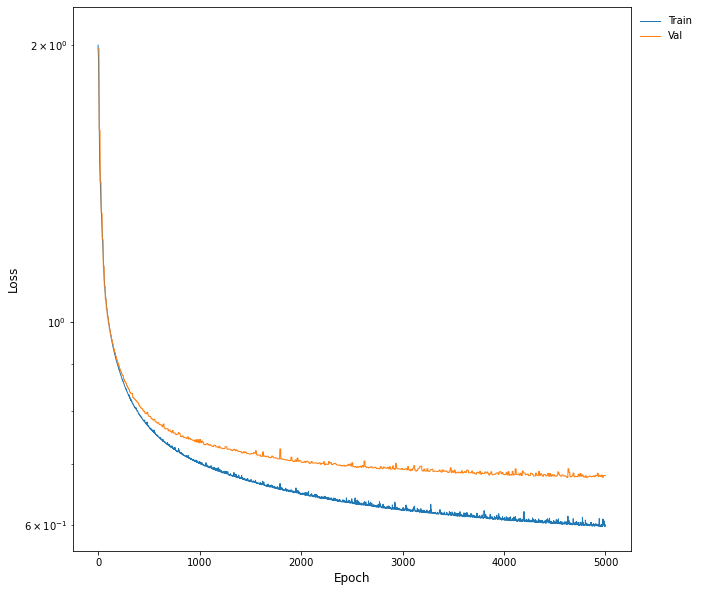

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0,1.1*train_loss_list[0])
plt.show()

In [5]:
# Get predictions and ground truths
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs)
mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df = get_metric_dataframes(configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

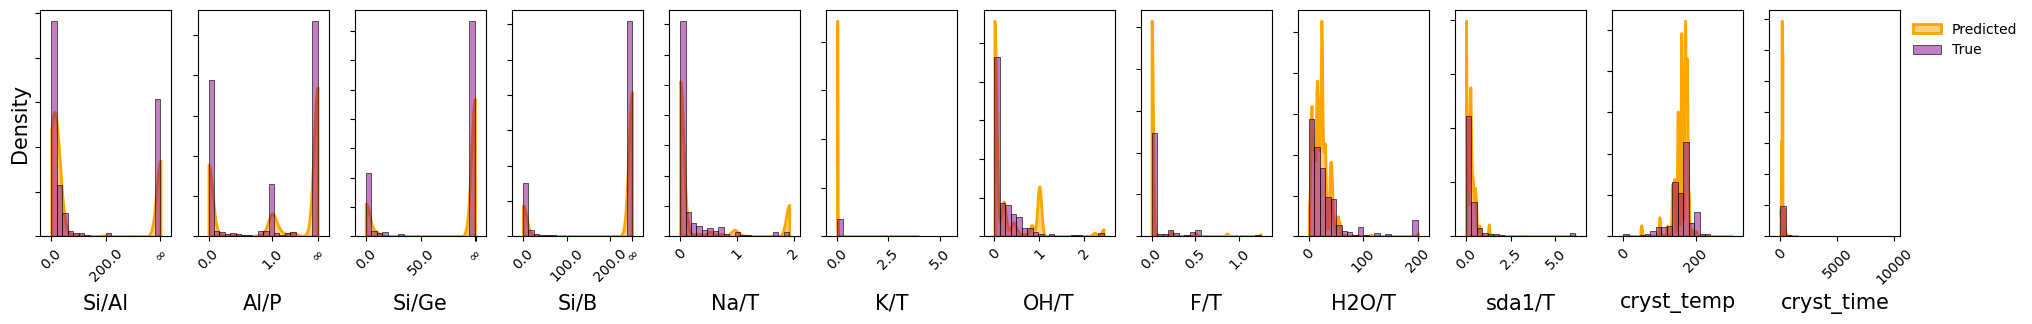

In [6]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, False], [False, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5)

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA
MMD: 0.6369876861572266
WSD: 0.17208388332756933


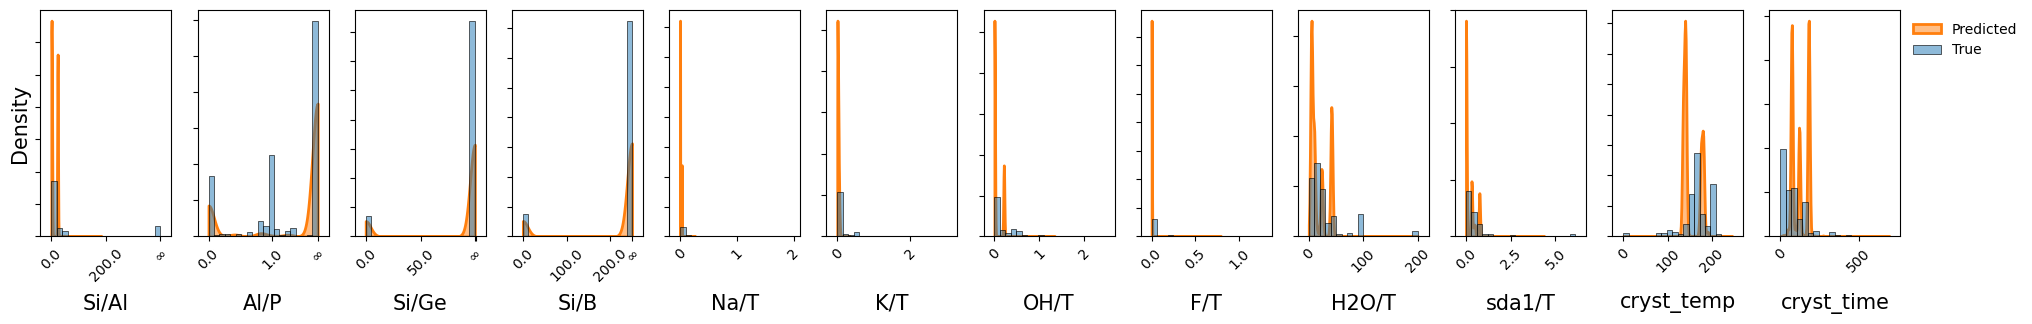

AEL
MMD: 2.141554832458496
WSD: 0.5107707851099246


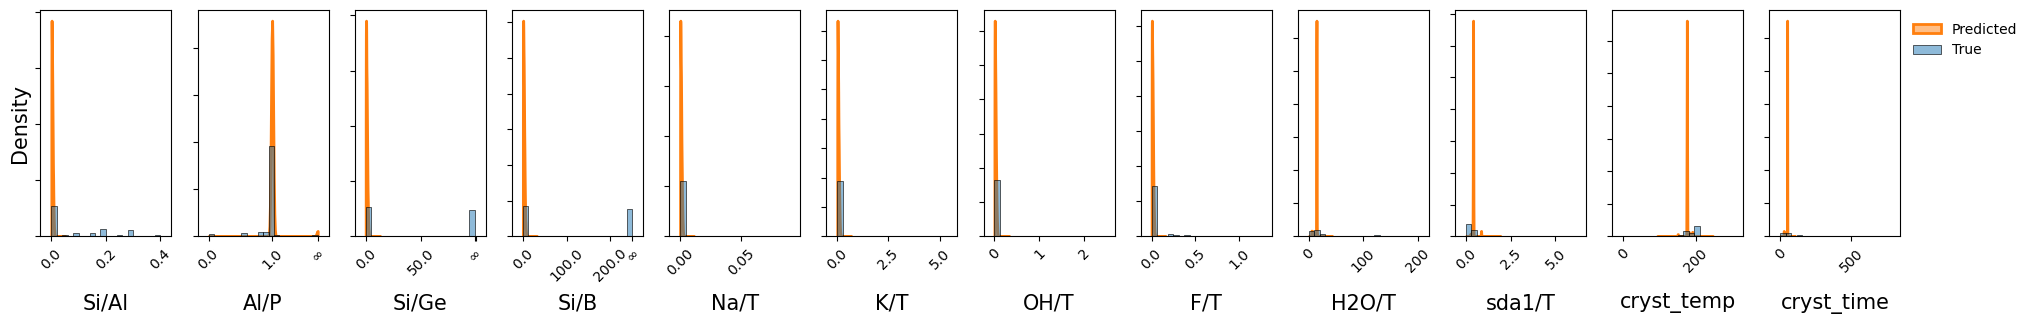

MFI
MMD: 0.8069267272949219
WSD: 0.09786351108060509


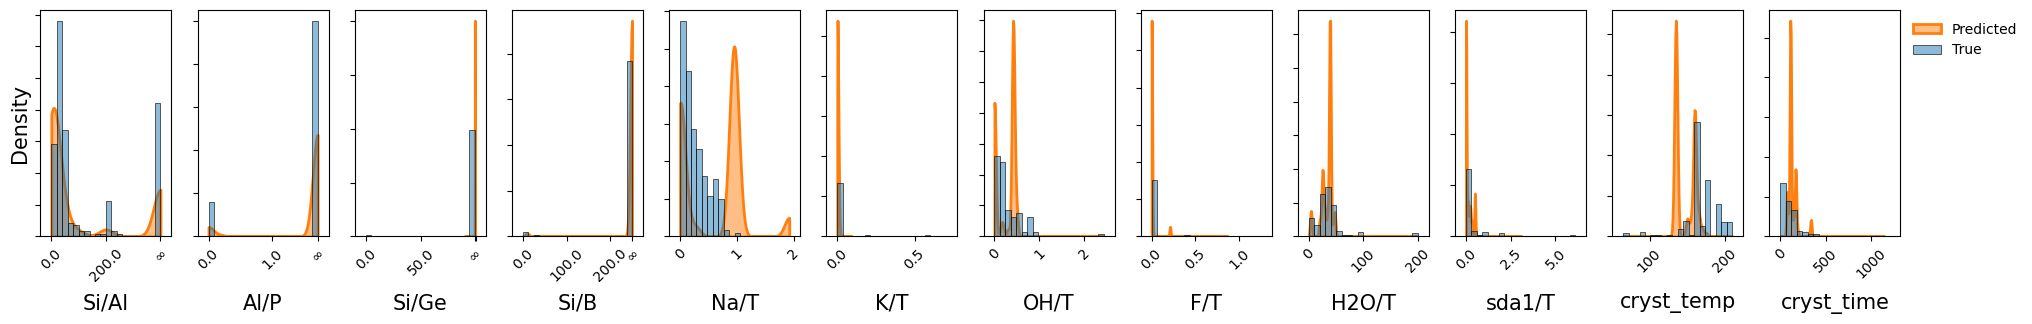

LTA
MMD: 1.5301742553710938
WSD: 0.5605051168757946


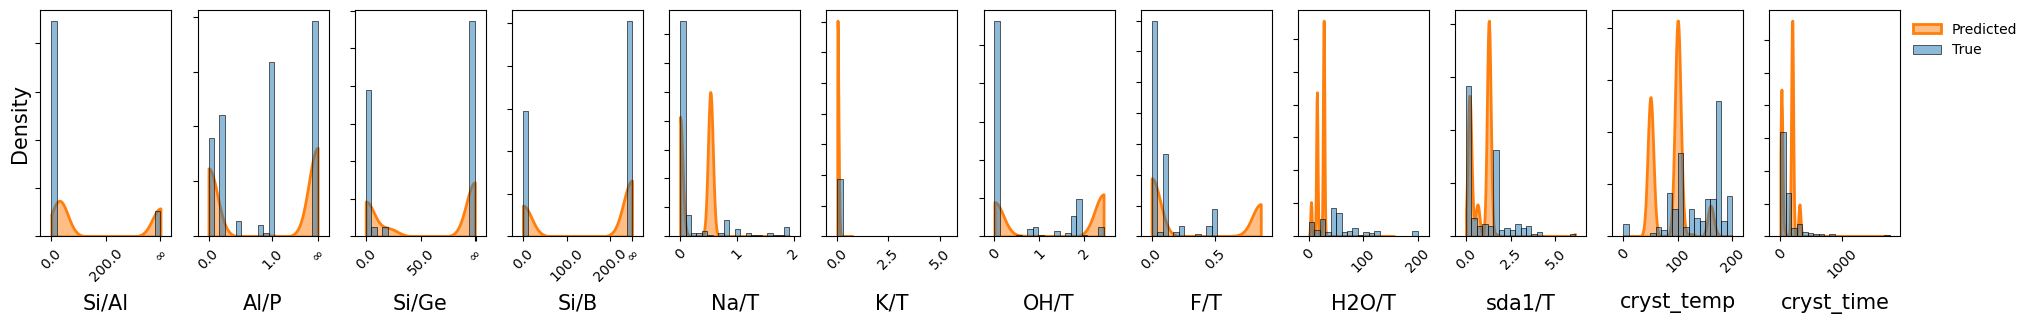

AFI
MMD: 0.800114631652832
WSD: 0.1233241584426162


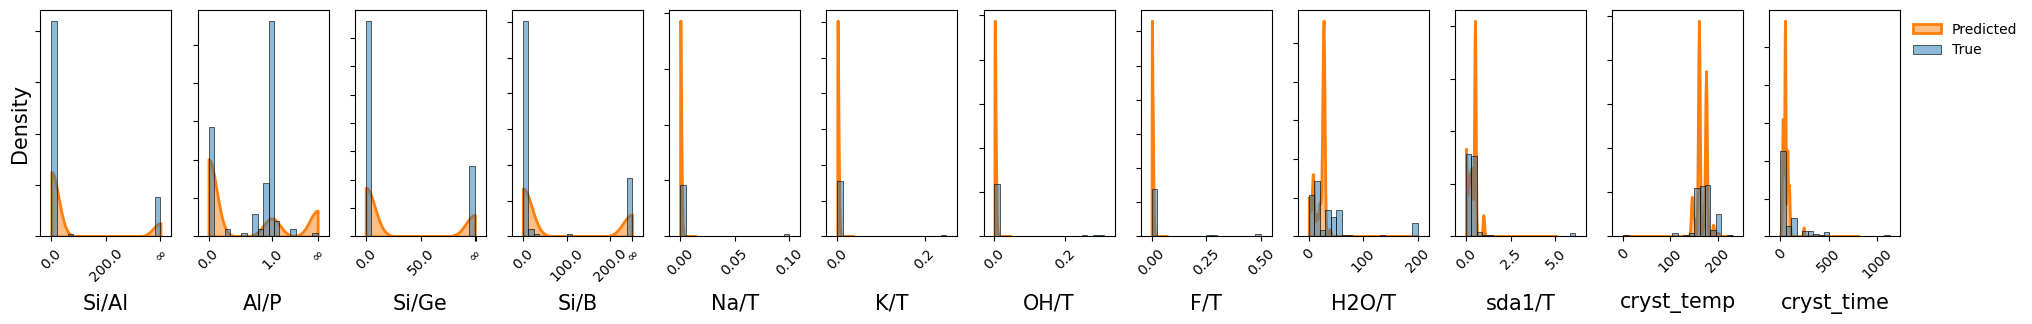

IWR
MMD: 2.133162021636963
WSD: 0.6119039925261669


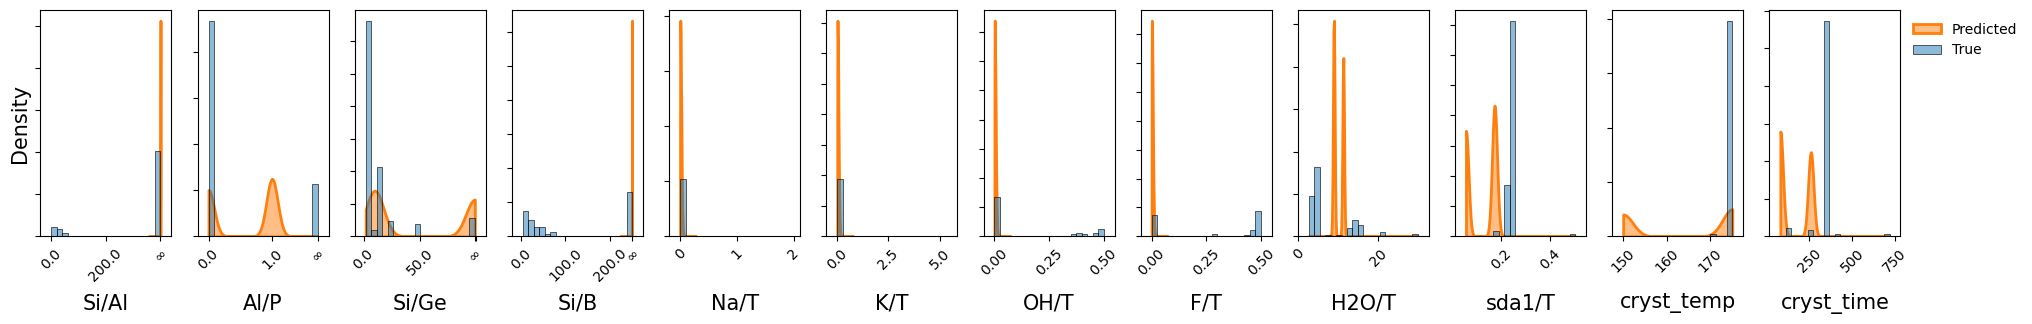

BEA
MMD: 1.0652809143066406
WSD: 0.34465813359948516


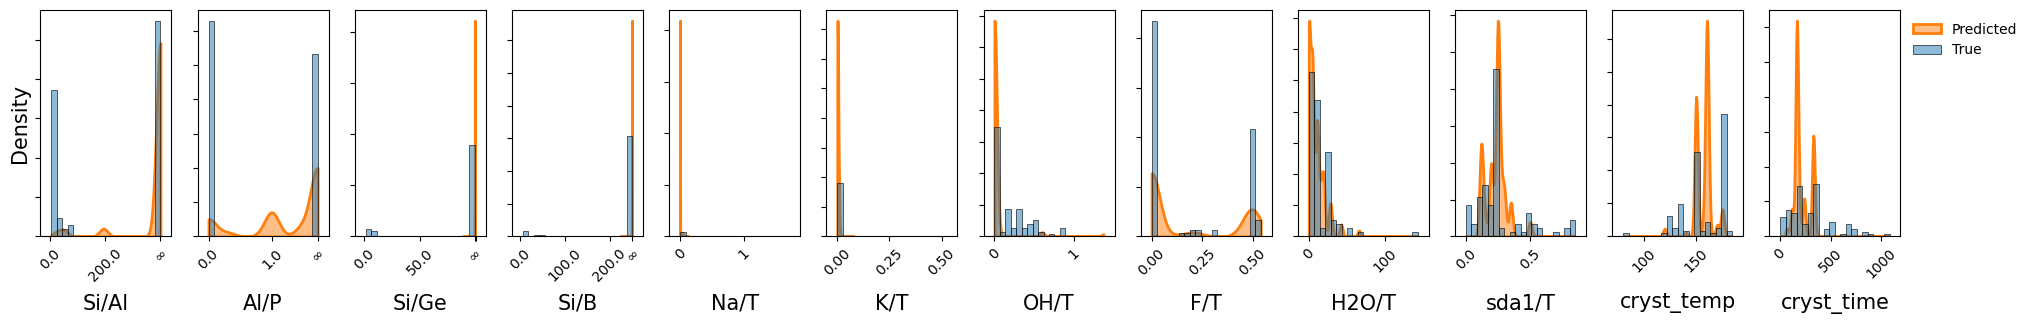

MTW
MMD: 0.7330074310302734
WSD: 0.1477474812340535


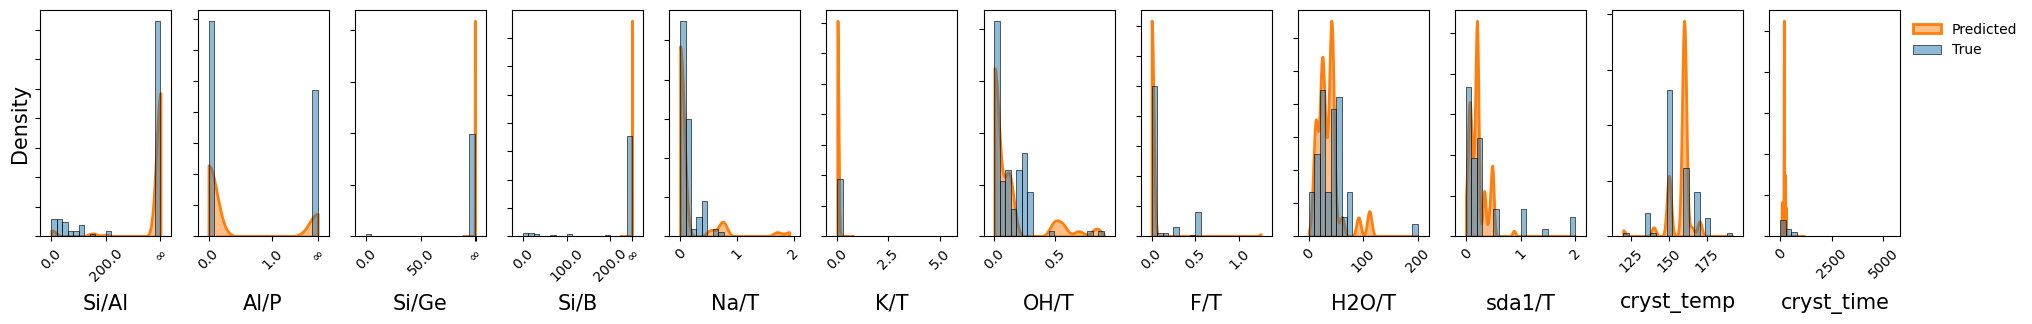

MEL
MMD: 2.2206640243530273
WSD: 0.5043597622028346


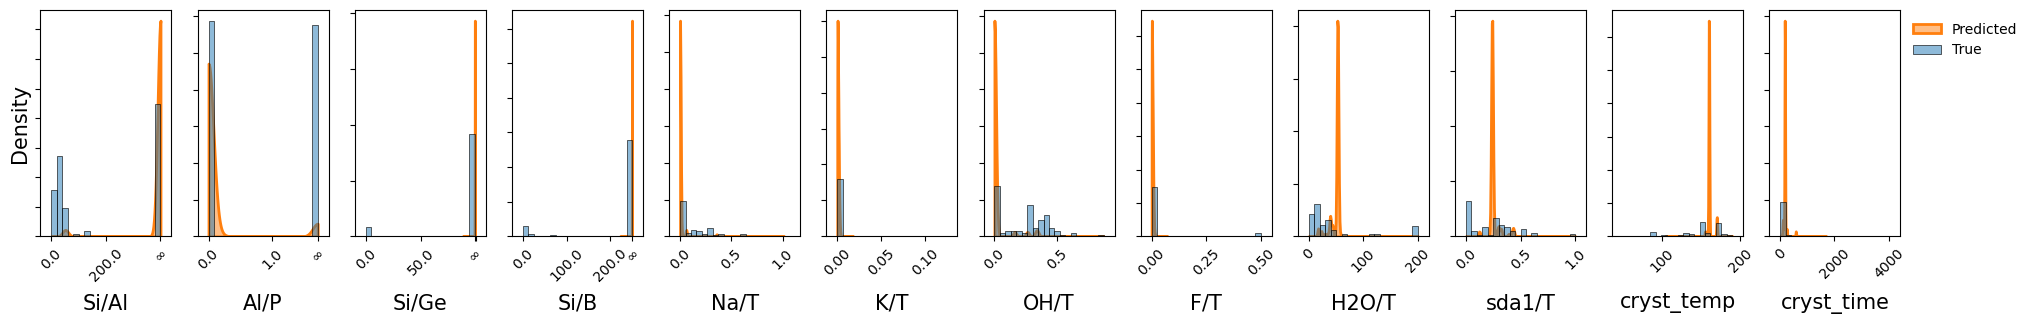

LEV
MMD: 0.8413867950439453
WSD: 0.22760134996304301


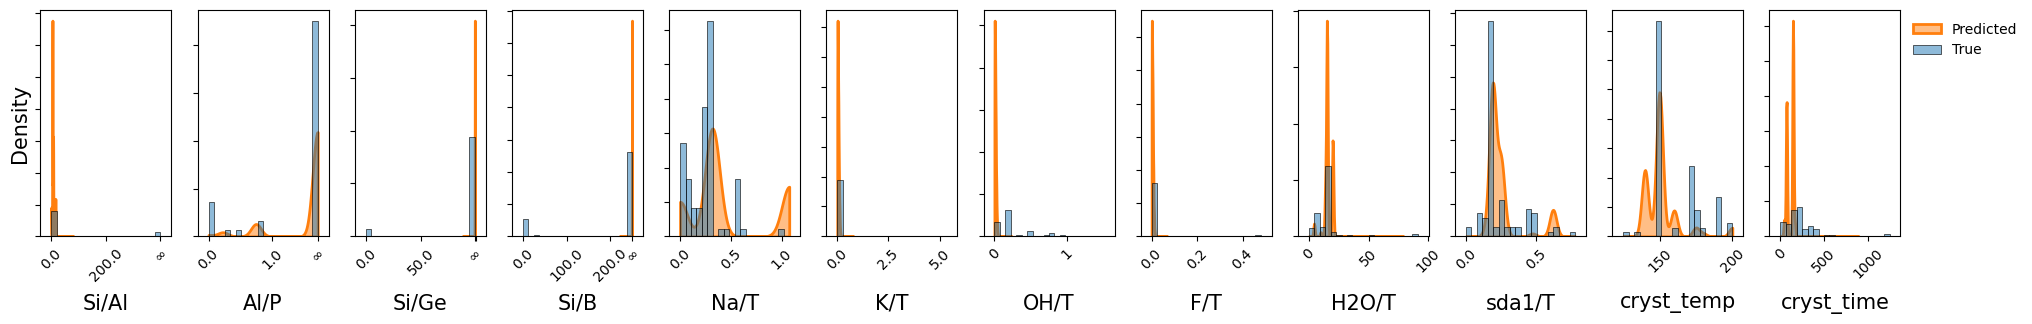

Mean MMD: 1.290925931930542
Mean WSD: 0.3300818174362093


In [7]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 1.2735261917114258
WSD: 0.14606694021923


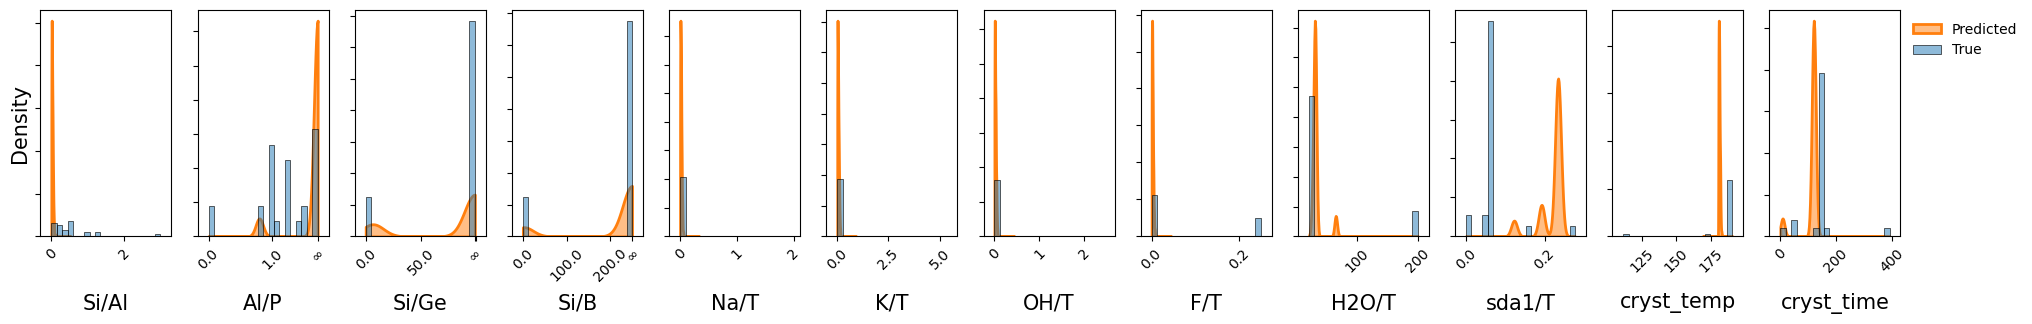

In [8]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 1.1175928115844729
WSD: 0.2881376144181624


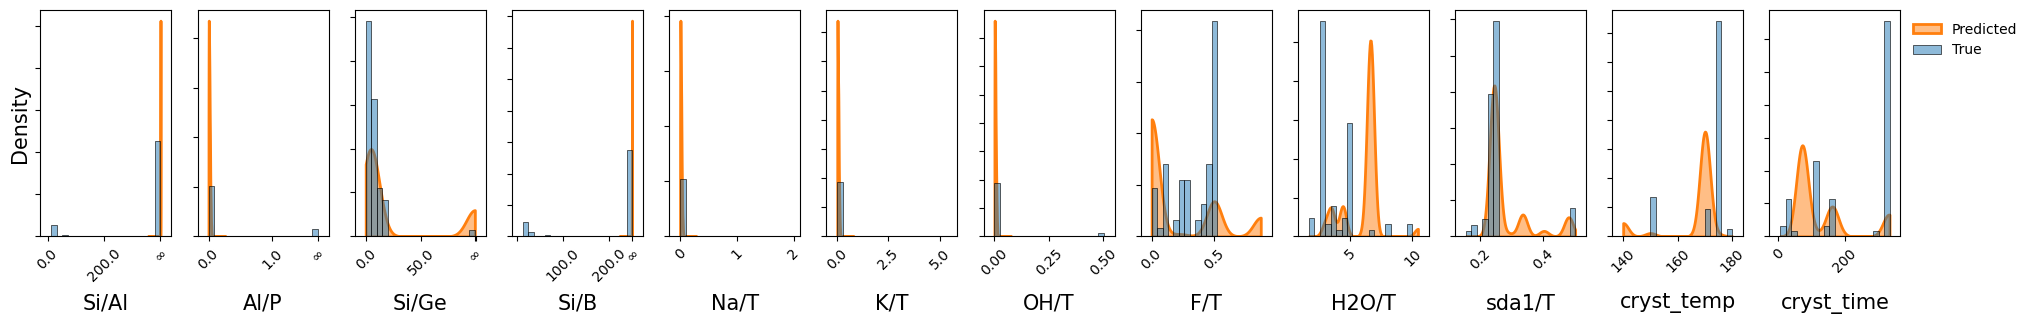

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.2034311294555664
WSD: 0.44902156645239716


LinAlgError: singular matrix

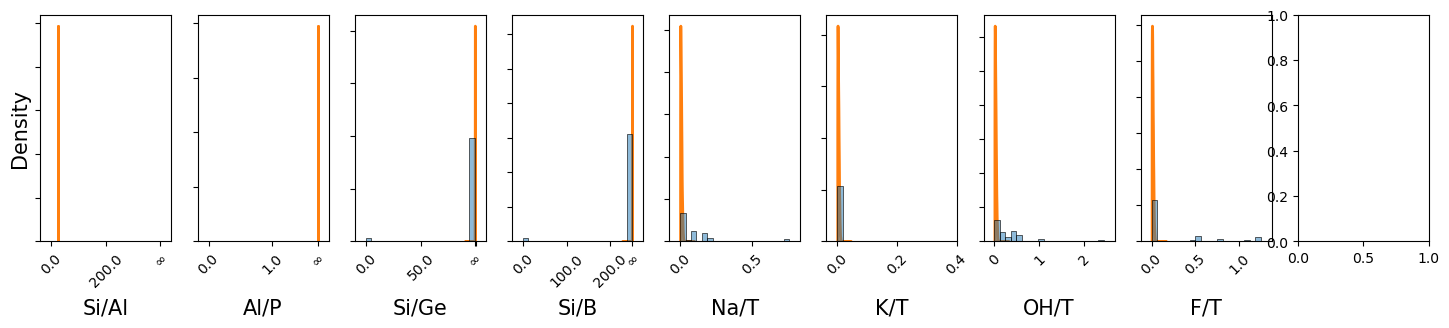

In [10]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.2034311294555664
WSD: 0.4490215696532419


LinAlgError: singular matrix

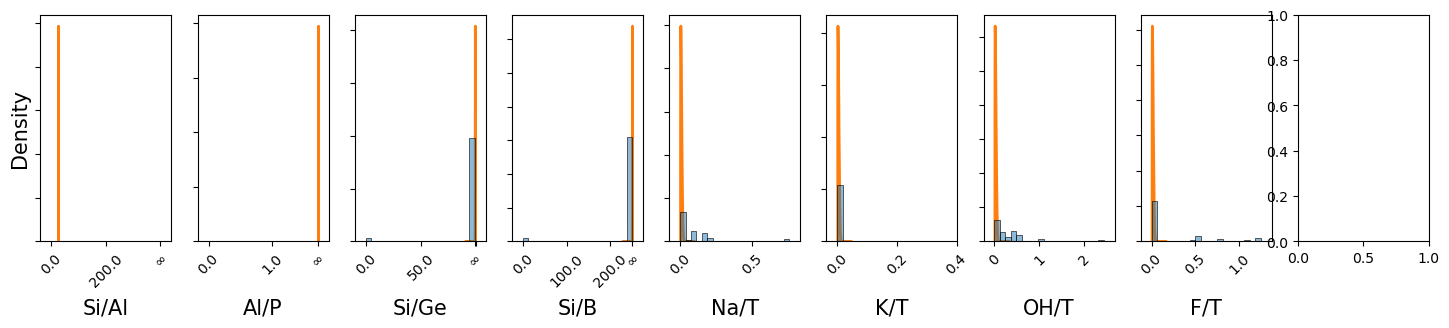

In [11]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')